# Color Space

color is the way that some detector – a camera, a computer, or a brain – perceives the light reflected, emitted, or transmitted from objects in an environment. A mathematically defined color space maps perceived colors onto a system of coordinates. Because human beings have trichromatic color vision (cone cells that have peak sensitivities at red, green, and blue wavelengths), most color spaces are three-dimensional. 

The most familiar of these is probably RGB, or red-green-blue, the tri-channel system that most computers use to store and display color images; other common ones include HSV (hue, saturation, and value) and CMYK (cyan, magenta, yellow, and key).

# RGB

    1. In RGB color model, all the colors are represented by adding the combinations of three primary colors; Red, Green, and Blue. 
    2. All the primary colors at full intensity form white represented by RGB(255, 255, 255), and at zero intensity gives black (0, 0, 0).
    3. One drawback of RGB colour space is that it has strongly correlated channels

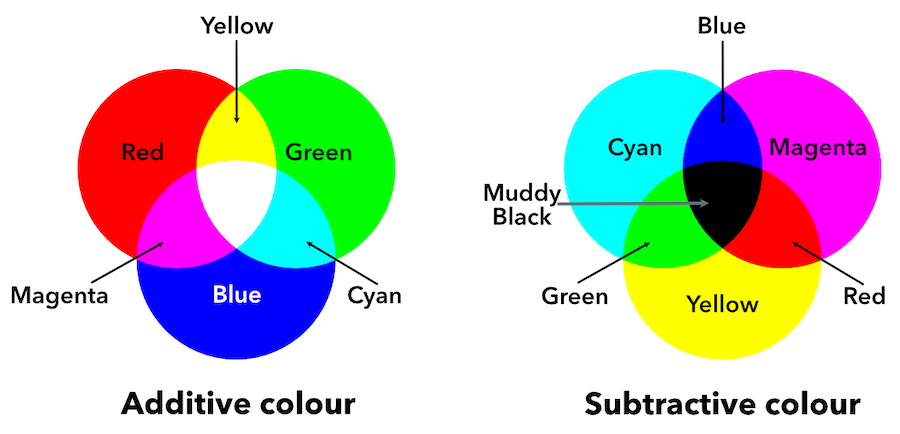

In [1]:
from IPython import display
display.Image("./rgb_cymk.png")

# CYMK
    
    1. The abbreviation CMYK refers to the four ink plates used: cyan, magenta, yellow, and key (black).
    2. Unlike RGB, CYMK is a subtractive color model i.e. the different colors are represented by subtracting some color from white.
    3. For example, cyan is white minus red. Cyan, magenta, and white are the complements of red, green and, blue respectively. The fourth black color is added to yield CYMK for better reproduction of colors. Conversion from RGB to CMYK: C=1−R, M=1−G, Y=1−B.

# HSV

    1. The HSV (Hue-Saturation-Value) is an alternative representation of the RGB.
    2. Designed in the 1970s, it more closely aligns with the way human vision perceives colour-making attributes. 
    3. It's useful in computer vision for color segmentation. In RGB, filtering specific colors isn't easy.
    4. In this colour space, colours of each hue are arranged in a radial slice, around a central axis of neutral colours which changes from white at the top to black at the bottom. 

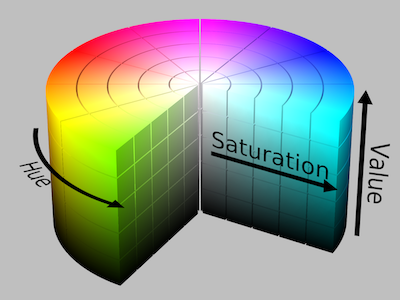

In [3]:
from IPython import display
display.Image("./HSV.png")

In [2]:
# Import the packages
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Hue
hue: the dominant color, name of the color itself e.g. red, yellow, green.
The value for hue ranges form 0-360 but since OpenCV stores images in uint8 (for memory reasons) so it stores value for the hue in range 0-180 (so it stays under 255). Note since hue wraps up the color for 180 and 0 is pretty similar (both are red).

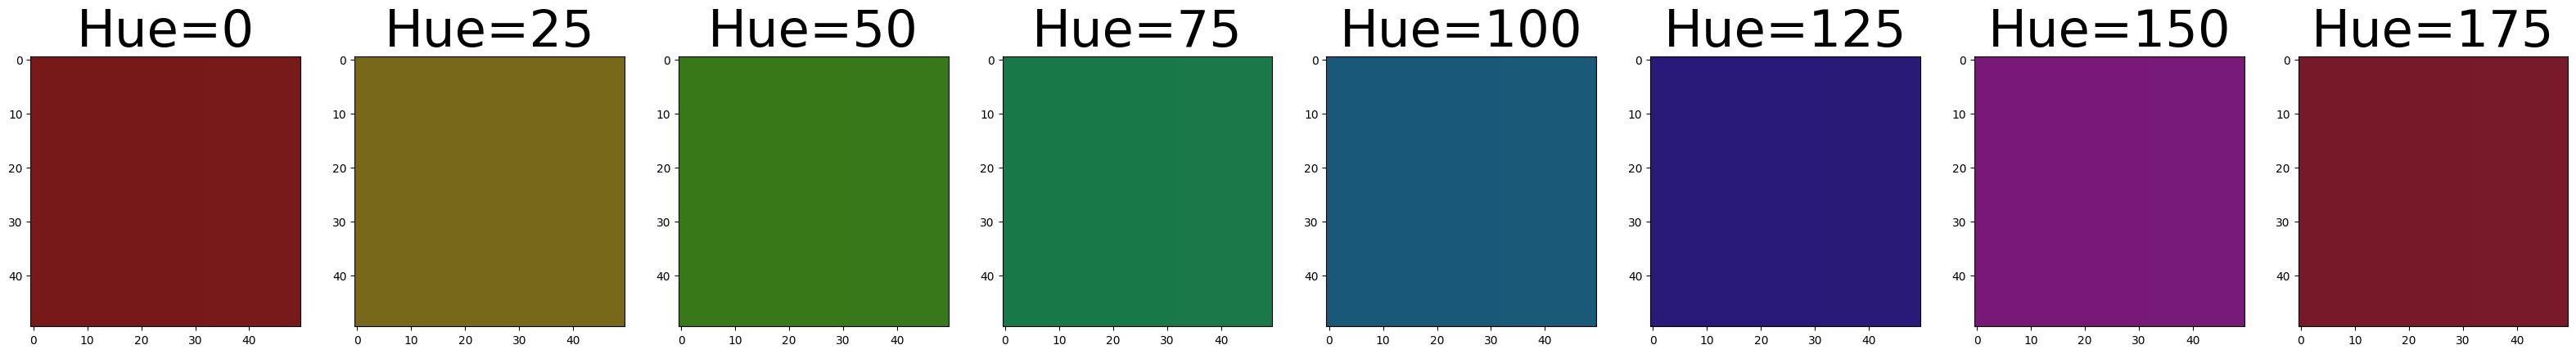

In [8]:
# Changing Hue Values
plt.figure(figsize=(40,40))
 
for i in range(0,8):
     
    hsv_image = np.zeros((50, 50, 3), dtype=np.uint8)
 
    # Hue is increased by 25 for every image and saturation and value is set to some middle value like 120.
    hue = i * 25
    hsv_image[:,:,:] = ( hue, 200, 120)
    #print(hsv_image)
     
    # Converting hsv to rgb for displaying in matplotlib
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
     
    # Display the image
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(rgb_image)
    plt.axis('off')  # this will not show the axis
    ax.set_title('Hue={}'.format(hue), fontdict={'fontsize': 45})

## Saturation

Saturation refers to how pure the color is. Different shades of a color correspond to different saturation levels. 

0 saturation in a blue colored image means that blue color is completely absent and the image is gray, half saturation is like a faded blue color and full saturation means that blue color is really vivid and fully present. The range for saturation is 0-255.
With the Hue and Saturation channels known, we have a better idea about the color and tints or shades of color in our image.

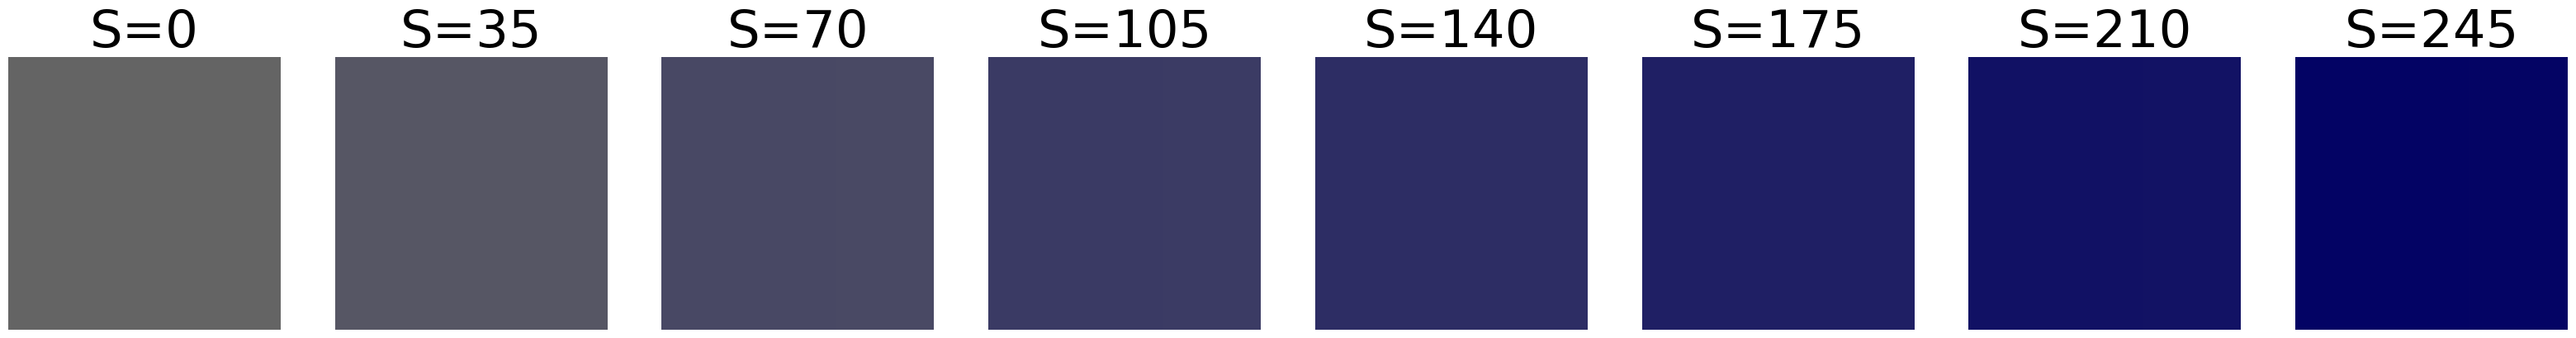

In [12]:
# Changing Saturation Values
plt.figure(figsize=(40,40))
 
for i in range(0,8):
     
    hsv_image = np.zeros((50, 50, 3), dtype=np.uint8)
 
    # saturation is increased by 35 for every image and hue and value is set to some middle value like 120.
    sat = i * 35
    
    hsv_image[:,:,:] = ( 120, sat, 100)
     
    # Converting hsv to rgb for displaying in matplotlib
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
     
    # Display the image
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(rgb_image)
    plt.axis('off')  # this will not show the axis
    ax.set_title('S={}'.format(sat), fontdict={'fontsize': 45})

## Value

Value refers to lightness or brightness. It indicates how dark or bright the color is. It also signifies the amount of light that might have fallen on the object.

A Value of zero would indicate pure black, whereas increasing the value would produce lighter colors. The range for value is 0-255.

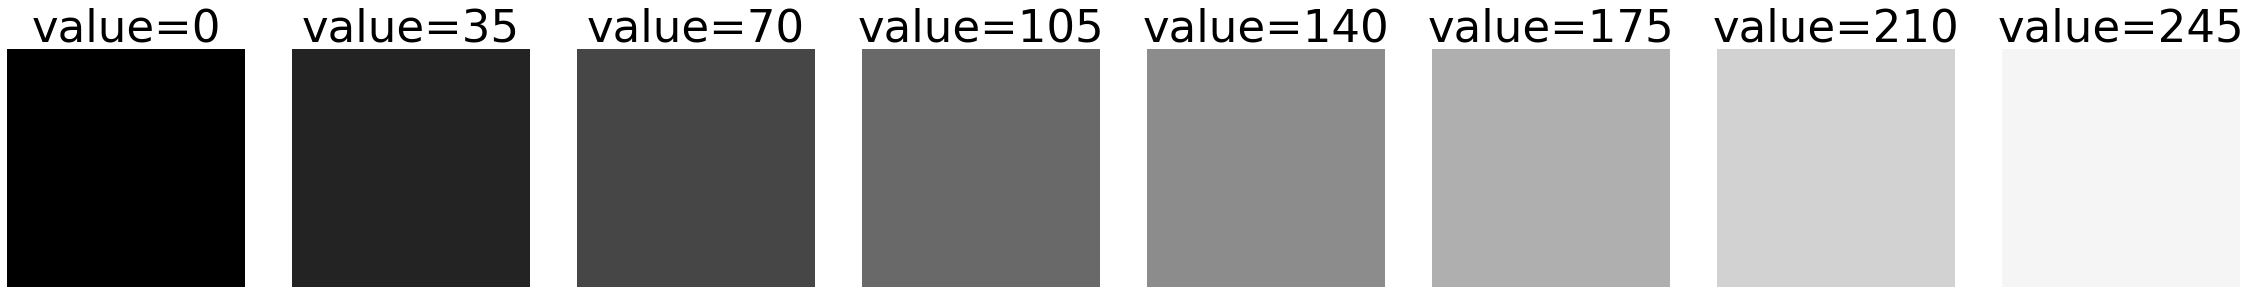

In [12]:
# Changing Value
plt.figure(figsize=(40,40))
 
for i in range(0,8):
     
    hsv_image = np.zeros((50, 50, 3), dtype=np.uint8)
 
    # value is increased by 35 for every image and hue and value is set to 0 or you can also set to 120 or any other value.
    value = i * 35
    hsv_image[:,:,:] = ( 120, 0, value)
     
    # Converting hsv to rgb for displaying in matplotlib
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
     
    # Display the image
    ax = plt.subplot(1, 8, i+1)
    plt.imshow(rgb_image)
    plt.axis('off')  # this will not show the axis
    ax.set_title('value={}'.format(value), fontdict={'fontsize': 45})

# Grayscale

A grayscale representation of an image throws away the color information of an image and can also be done using the cv2.cvtColor  function.

The grayscale representation of an image is often referred to as “black and white,” but this is not technically correct. Grayscale images are single channel images with pixel values in the range [0, 255] (i.e. 256 unique values).

Average method: Average method is the most simple one. You just have to take the average of three colors. Since its an RGB image, so it means that you have add r with g with b and then divide it by 3 to get your desired grayscale image.

Its done in this way.

Grayscale = (R + G + B / 3)

Weighted method or luminosity method: Since red color has more wavelength of all the three colors, and green is the color that has not only less wavelength than red color but also green is the color that gives more soothing effect to the eyes.It means that we have to decrease the contribution of red color, and increase the contribution of the green color, and put blue color contribution in between these two.

When converting to grayscale, each RGB channel is not weighted uniformly, we weight each channel differently to account for how much color we perceive of each:

grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) ).

(639, 860, 3)


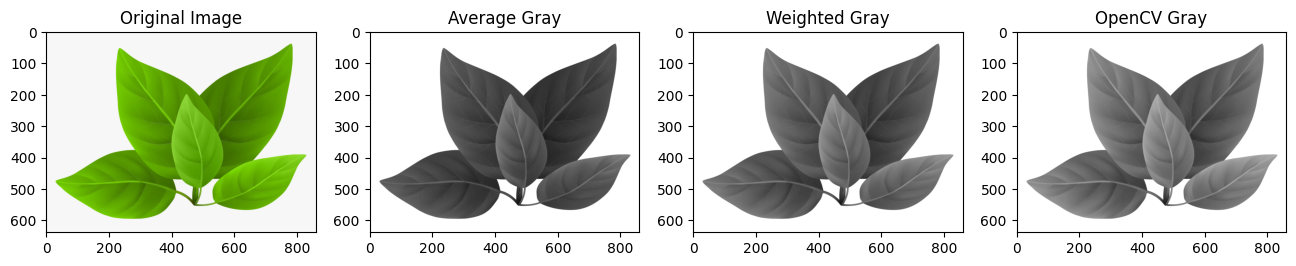

In [16]:
import cv2

original_image = cv2.imread("leave.png")
blue = original_image[:,:,0]
green = original_image[:,:,1]
red = original_image[:,:,2]
Average_Gray = blue/3+green/3+red/3
Weighted_Gray = (0.3 * blue) + (0.59 * green) + (0.11 * red)
OpenCV_Gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[16,8])
plt.subplot(1,4,1);
plt.imshow(original_image[:,:,::-1]);
plt.title("Original Image")

plt.subplot(1,4,2);
plt.imshow(Average_Gray, cmap = "gray");
plt.title("Average Gray");

plt.subplot(1,4,3);
plt.imshow(Weighted_Gray, cmap = "gray");
plt.title("Weighted Gray");

plt.subplot(1,4,4);
plt.imshow(OpenCV_Gray, cmap = "gray");
plt.title("OpenCV Gray");

# Alpha Channel

The alpha channel is a color component that represents the degree of transparency (or opacity) of a color (i.e., the red, green and blue channels). It is used to determine how a pixel is rendered when blended with another.

The alpha channel controls the transparency or opacity of a color. Its value can be represented as a real value, a percentage, or an integer: full transparency is 0.0, 0% or 0, whereas full opacity is 1.0, 100% or 255, respectively.

When a color (source) is blended with another color (background), e.g., when an image is overlaid onto another image, the alpha value of the source color is used to determine the resulting color. If the alpha value is opaque, the source color overwrites the destination color; if transparent, the source color is invisible, allowing the background color to show through. If the value is in between, the resulting color has a varying degree of transparency/opacity, which creates a translucent effect.

image Dimension =(337, 400, 4)


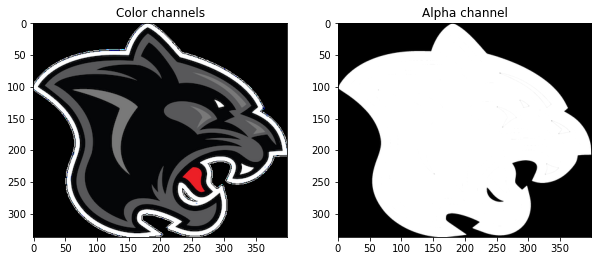

In [8]:
imagePath = "./icon.png"

# Read the image
# Note that we are passing flag = -1 while reading the image ( it will read the image as is)
imgPNG = cv2.imread(imagePath,-1)
print("image Dimension ={}".format(imgPNG.shape))
#First 3 channels will be combined to form BGR image
#Mask is the alpha channel of the original image
imgBGR = imgPNG[:,:,0:3]
imgMask = imgPNG[:,:,3]
plt.figure(figsize=[10,10])
plt.subplot(1,2,1);
plt.imshow(imgBGR[:,:,::-1]);
plt.title('Color channels');
plt.subplot(1,2,2);
plt.imshow(imgMask,cmap='gray');
plt.title('Alpha channel');

References:

1. https://kharshit.github.io/blog/2020/01/17/color-and-color-spaces-in-computer-vision
2. https://cvexplained.wordpress.com/tag/color-spaces/
3. https://cran.r-project.org/web/packages/colordistance/vignettes/color-spaces.html
4. https://medium.com/@ryanxdebelen/computer-vision-image-formation-and-colour-spaces-ff0d90c49c65]
5. https://www.techopedia.com/definition/1945/alpha-channel